In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

/Users/brianconnor/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/brianconnor/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/brianconnor/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will b

Couldn't import dot_parser, loading of dot files will not be possible.


Going to pipeline gridsearch more intepretable models, because we want to be able to tell what is causing cases of dengue rather than just predicting the number

Since the vegetation index is already weird and arcane, I'm going to make a predictive index from an NN from just the 4 pixels and then feed that + other features into a bunch of different models to see what works best

In [2]:
train_csv = "./data/cleaned_train.csv"
train = pd.read_csv(train_csv)

In [3]:
train.drop(labels=["Unnamed: 0", "week_start_date"], axis=1, inplace=True)

In [4]:
train = pd.get_dummies(train)

In [5]:
target = "total_cases"

y = train[target]

In [6]:
veggie_index = ["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw"]
X_veg = train[veggie_index]

In [7]:
X_veg.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
0,0.122600,0.103725,0.198483,0.177617
1,0.169900,0.142175,0.162357,0.155486
2,0.032250,0.172967,0.157200,0.170843
3,0.128633,0.245067,0.227557,0.235886
4,0.196200,0.262200,0.251200,0.247340


In [8]:
# i'm not going to train test split this because its supposed to be added in later as a feature
ss_veg = StandardScaler()
X_veg = ss_veg.fit_transform(X_veg)

In [9]:
veggie_indexer = Sequential()

veggie_indexer.add(Dense(units=4,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(.01),
                         input_dim=X_veg.shape[1]))
veggie_indexer.add(Dropout(.1))

veggie_indexer.add(Dense(units=16,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(.01)))
veggie_indexer.add(Dropout(.1))

veggie_indexer.add(Dense(units=1,
                         activation=None,
                         kernel_regularizer=regularizers.l2(.01)))

veggie_indexer.compile(optimizer="adam", loss="mean_absolute_error")

veggie_indexer.fit(x=X_veg, y=y, epochs=500)

Epoch 1/500
1262/1262 [==============================] - 1s 450us/step - loss: 21.0105
Epoch 2/500
1262/1262 [==============================] - 0s 43us/step - loss: 20.7019
Epoch 3/500
1262/1262 [==============================] - 0s 43us/step - loss: 20.3895
Epoch 4/500
1262/1262 [==============================] - 0s 42us/step - loss: 19.9968
Epoch 5/500
1262/1262 [==============================] - 0s 40us/step - loss: 19.4624
Epoch 6/500
1262/1262 [==============================] - 0s 34us/step - loss: 18.8360
Epoch 7/500
1262/1262 [==============================] - 0s 33us/step - loss: 18.1784
Epoch 8/500
1262/1262 [==============================] - 0s 33us/step - loss: 17.4717
Epoch 9/500
1262/1262 [==============================] - 0s 34us/step - loss: 16.9493
Epoch 10/500
1262/1262 [==============================] - 0s 33us/step - loss: 16.6464
Epoch 11/500
1262/1262 [==============================] - 0s 34us/step - loss: 16.5229
Epoch 12/500
1262/1262 [===========================

1262/1262 [==============================] - 0s 34us/step - loss: 15.8118
Epoch 96/500
1262/1262 [==============================] - 0s 33us/step - loss: 15.8646
Epoch 97/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.8368
Epoch 98/500
1262/1262 [==============================] - 0s 33us/step - loss: 15.8148
Epoch 99/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.8950
Epoch 100/500
1262/1262 [==============================] - 0s 30us/step - loss: 15.8240
Epoch 101/500
1262/1262 [==============================] - 0s 30us/step - loss: 15.8331
Epoch 102/500
1262/1262 [==============================] - 0s 29us/step - loss: 15.8672
Epoch 103/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.9641
Epoch 104/500
1262/1262 [==============================] - 0s 29us/step - loss: 15.8066
Epoch 105/500
1262/1262 [==============================] - 0s 28us/step - loss: 15.9411
Epoch 106/500
1262/1262 [=========================

1262/1262 [==============================] - 0s 31us/step - loss: 15.8053
Epoch 189/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.7708
Epoch 190/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.7821
Epoch 191/500
1262/1262 [==============================] - 0s 37us/step - loss: 15.7602
Epoch 192/500
1262/1262 [==============================] - 0s 30us/step - loss: 15.8719
Epoch 193/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.7899
Epoch 194/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.8583
Epoch 195/500
1262/1262 [==============================] - 0s 33us/step - loss: 15.8281
Epoch 196/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.6894
Epoch 197/500
1262/1262 [==============================] - 0s 33us/step - loss: 15.8154
Epoch 198/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.7598
Epoch 199/500
1262/1262 [=====================

1262/1262 [==============================] - 0s 32us/step - loss: 15.7843
Epoch 282/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.7496
Epoch 283/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.7174
Epoch 284/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.7279
Epoch 285/500
1262/1262 [==============================] - 0s 34us/step - loss: 15.7874
Epoch 286/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.7065
Epoch 287/500
1262/1262 [==============================] - 0s 33us/step - loss: 15.7841
Epoch 288/500
1262/1262 [==============================] - 0s 30us/step - loss: 15.7932
Epoch 289/500
1262/1262 [==============================] - 0s 35us/step - loss: 15.6846
Epoch 290/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.7257
Epoch 291/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.8296
Epoch 292/500
1262/1262 [=====================

1262/1262 [==============================] - 0s 37us/step - loss: 15.6895
Epoch 375/500
1262/1262 [==============================] - 0s 34us/step - loss: 15.7213
Epoch 376/500
1262/1262 [==============================] - 0s 38us/step - loss: 15.7381
Epoch 377/500
1262/1262 [==============================] - 0s 44us/step - loss: 15.7496
Epoch 378/500
1262/1262 [==============================] - 0s 42us/step - loss: 15.7246
Epoch 379/500
1262/1262 [==============================] - 0s 39us/step - loss: 15.7645
Epoch 380/500
1262/1262 [==============================] - 0s 38us/step - loss: 15.7357
Epoch 381/500
1262/1262 [==============================] - 0s 35us/step - loss: 15.6475
Epoch 382/500
1262/1262 [==============================] - 0s 35us/step - loss: 15.6605
Epoch 383/500
1262/1262 [==============================] - 0s 36us/step - loss: 15.7120
Epoch 384/500
1262/1262 [==============================] - 0s 33us/step - loss: 15.7344
Epoch 385/500
1262/1262 [=====================

1262/1262 [==============================] - 0s 37us/step - loss: 15.8313
Epoch 468/500
1262/1262 [==============================] - 0s 48us/step - loss: 15.6866
Epoch 469/500
1262/1262 [==============================] - 0s 36us/step - loss: 15.6527
Epoch 470/500
1262/1262 [==============================] - 0s 36us/step - loss: 15.7310
Epoch 471/500
1262/1262 [==============================] - 0s 36us/step - loss: 15.7469
Epoch 472/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.7881
Epoch 473/500
1262/1262 [==============================] - 0s 33us/step - loss: 15.5716
Epoch 474/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.7087
Epoch 475/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.6928
Epoch 476/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.6382
Epoch 477/500
1262/1262 [==============================] - 0s 29us/step - loss: 15.6598
Epoch 478/500
1262/1262 [=====================

In [10]:
v_index = veggie_indexer.predict(X_veg)

In [11]:
train.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_iq,city_sj
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0,1
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0,1
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0,1
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0,1
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0,1


In [12]:
train.drop(labels=veggie_index, axis=1, inplace=True)

In [13]:
train["vegitation_index"] = v_index

In [14]:
train.head()

,year,weekofyear,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_iq,city_sj,vegitation_index
0,1990,18,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0,1,13.853563
1,1990,19,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0,1,10.847936
2,1990,20,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0,1,16.739052
3,1990,21,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0,1,9.731987
4,1990,22,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0,1,6.328077


In [15]:
features = [x for x in train.columns if x != target]
X = train[features]
y = train[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [17]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [18]:
# pipelining and gridsearch

In [19]:

models  = {'rf': [RandomForestRegressor(), {'n_estimators' : [31,32,33,34,35], 'max_depth' : [18,19,20,21]}],
         'bag': [BaggingRegressor(), {'n_estimators' : [14,15,16,17]}],
         'ada': [AdaBoostRegressor(), {'n_estimators' : [45,50,55]}],
         'knn': [KNeighborsRegressor(), {'n_neighbors': [9,10,11]}],
         'lg': [LassoCV(), {'alphas': [np.linspace(1, 10, 1000)]}],
         'ridge' : [RidgeCV(), {"alphas": [np.logspace(0,5,200)]}]
            }

In [20]:
for i, j in models.items():
    gs = GridSearchCV(j[0], j[1])
    gs.fit(Xs_train, y_train)
    y_pred = gs.predict(Xs_test)
    print(i, gs.best_params_, mean_absolute_error(y_test, y_pred))

rf {'max_depth': 19, 'n_estimators': 32} 10.747457483382622
bag {'n_estimators': 16} 11.29173259493671
ada {'n_estimators': 45} 23.463891914458035
knn {'n_neighbors': 9} 12.622362869198314
lg {'alphas': array([ 1.        ,  1.00900901,  1.01801802,  1.02702703,  1.03603604,
        1.04504505,  1.05405405,  1.06306306,  1.07207207,  1.08108108,
        1.09009009,  1.0990991 ,  1.10810811,  1.11711712,  1.12612613,
        1.13513514,  1.14414414,  1.15315315,  1.16216216,  1.17117117,
        1.18018018,  1.18918919,  1.1981982 ,  1.20720721,  1.21621622,
        1.22522523,  1.23423423,  1.24324324,  1.25225225,  1.26126126,
        1.27027027,  1.27927928,  1.28828829,  1.2972973 ,  1.30630631,
        1.31531532,  1.32432432,  1.33333333,  1.34234234,  1.35135135,
        1.36036036,  1.36936937,  1.37837838,  1.38738739,  1.3963964 ,
        1.40540541,  1.41441441,  1.42342342,  1.43243243,  1.44144144,
        1.45045045,  1.45945946,  1.46846847,  1.47747748,  1.48648649,
     

ridge {'alphas': array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+00, 3.57078596e+00, 3.78346262e+00,
       4.00880633e+00, 4.24757155e+00, 4.50055768e+00, 4.76861170e+00,
       5.05263107e+00, 5.35356668e+00, 5.67242607e+00, 6.01027678e+00,
       6.36824994e+00, 6.74754405e+00, 7.14942899e+00, 7.57525026e+00,
       8.02643352e+00, 8.50448934e+00, 9.01101825e+00, 9.54771611e+00,
       1.01163798e+01, 1.07189132e+01, 1.13573336e+01, 1.20337784e+01,
       1.27505124e+01, 1.35099352e+01, 1.43145894e+01, 1.51671689e+01,
       1.60705282e+01, 1.70276917e+01, 1.80418641e+01, 1.91164408e+01,
       2.02550194e+01, 2.14614120e+01, 2.27396575e+01, 2.409

In [21]:
rf = RandomForestRegressor(n_estimators=33, max_depth=20)
bg = BaggingRegressor(n_estimators=16)
knn = KNeighborsRegressor(n_neighbors=10)
lg = LassoCV(alphas=[np.linspace(1,10,1000)])

In [22]:
rf.fit(X_train, y_train)
bg.fit(X_train, y_train)
knn.fit(X_train, y_train)
lg.fit(X_train, y_train)

LassoCV(alphas=[array([ 1.     ,  1.00901, ...,  9.99099, 10.     ])],
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [23]:
X_train

,year,weekofyear,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_iq,city_sj,vegitation_index
650,2006,3,74.41,298.401429,298.528571,294.417143,300.9,296.7,41.50,78.720000,...,15.794286,2.428571,24.714286,6.357143,30.6,20.6,101.1,0,1,16.484945
384,1999,46,83.66,298.968571,299.078571,296.330000,301.3,298.0,104.51,85.404286,...,17.817143,1.814286,26.714286,5.800000,30.6,22.8,62.1,0,1,21.218359
1050,2006,21,91.40,297.992857,299.114286,293.777143,307.7,288.8,12.47,80.385714,...,15.460000,10.885714,27.466667,10.433333,34.0,21.7,83.0,1,0,9.510035
1140,2008,8,122.64,297.095714,298.321429,295.608571,304.1,292.9,33.90,92.370000,...,17.130000,7.614286,28.000000,10.800000,33.4,22.0,115.3,1,0,6.921919
92,1992,27,10.74,300.177143,300.378571,296.275714,301.8,298.3,10.00,79.334286,...,17.667143,2.271429,29.228571,6.642857,33.3,25.6,3.1,0,1,13.286638
1051,2006,22,79.48,295.987143,297.171429,294.557143,304.1,291.3,44.65,92.505714,...,16.025714,6.885714,25.600000,8.933333,31.9,19.3,150.2,1,0,15.412428
1193,2009,9,147.44,297.391429,298.864286,296.494286,306.6,294.3,102.72,95.121429,...,18.128571,7.071429,26.580000,10.520000,33.2,20.5,84.1,1,0,4.923857
502,2002,32,39.52,301.002857,301.200000,296.742857,303.3,298.0,9.36,77.788571,...,18.201429,3.514286,28.471429,6.100000,32.2,25.0,3.6,0,1,15.120541
976,2004,51,49.56,298.701429,300.035714,296.385714,308.5,293.8,38.00,88.780000,...,18.040000,10.214286,28.375000,9.650000,34.0,22.6,128.3,1,0,5.785433
537,2003,20,10.86,299.577143,299.728571,294.601429,301.5,297.7,7.70,74.230000,...,15.930000,2.714286,26.900000,6.828571,31.1,22.8,7.0,0,1,16.466494


In [24]:
lg_coefs = lg.coef_
lr_df = pd.DataFrame((np.absolute(lg_coefs)))
lr_df.set_index(X_train.columns, inplace=True)

In [25]:
lr_df.head()

,0
year,0.976056
weekofyear,0.368612
precipitation_amt_mm,0.000501
reanalysis_air_temp_k,0.000000
reanalysis_avg_temp_k,0.000000


In [26]:
lr_df.rename({0:"alpha"}, axis=1, inplace=True)

In [27]:
lr_df.head()

,alpha
year,0.976056
weekofyear,0.368612
precipitation_amt_mm,0.000501
reanalysis_air_temp_k,0.000000
reanalysis_avg_temp_k,0.000000


In [28]:
lr_df.sort_values(by="alpha", ascending=False, inplace=True)
lr_df.head(6)

,alpha
year,0.976056
reanalysis_min_air_temp_k,0.822375
vegitation_index,0.760257
weekofyear,0.368612
reanalysis_tdtr_k,0.258125
reanalysis_precip_amt_kg_per_m2,0.031167


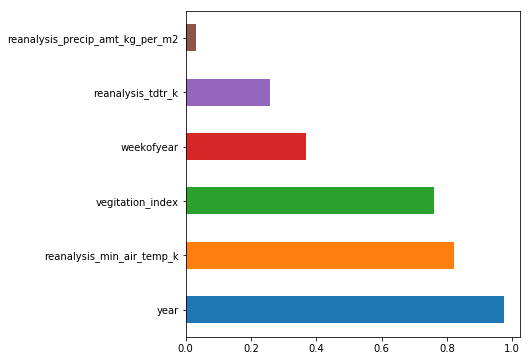

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
lr_df.alpha.head(6).plot(kind="barh", ax=ax)
ax.tick_params(colors="black")

In [135]:
mae_df = pd.DataFrame()

In [136]:
mae_df["NN Features"] = ["poly-weather/cleaning 1", "poly-weather/cleaning 2", "no poly", "poly-weather/separate cities", "poly-weather/tuned", "no-poly/tuned/early", "poly/tuned/early", "no-poly/tuned2/early", "adjusted"]

In [138]:
mae_df["MAE Score"] = [29.6010, 29.1298, 30.3846, 30.7716, 28.0769, 31.2332, 29.8438, 29.7476, 30.5986]

In [151]:
mae_df

,NN Features,MAE Score
0,poly-weather/cleaning 1,29.6010
1,poly-weather/cleaning 2,29.1298
2,no poly,30.3846
3,poly-weather/separate cities,30.7716
4,poly-weather/tuned,28.0769
5,no-poly/tuned/early,31.2332
6,poly/tuned/early,29.8438
7,no-poly/tuned2/early,29.7476
8,adjusted,30.5986


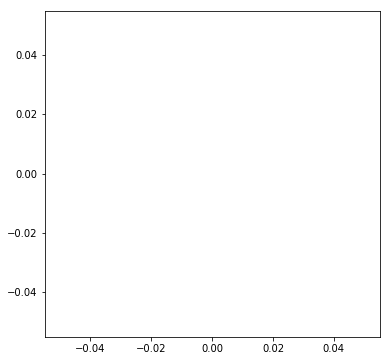

In [150]:
fig, ax = plt.subplots(figsize=(6,6))
mae_df.plot(kind="barh", ax=ax)
ax.tick_params(colors="white")
ax.scatter

#### prepping hold out

In [32]:
test = pd.read_csv("./data/test.csv")

In [33]:
test.drop(["Unnamed: 0", "week_start_date"], axis=1, inplace=True)

In [34]:
test_veg_X = test[veggie_index]

In [35]:
test_veg_preds = veggie_indexer.predict(test_veg_X)

In [36]:
test["vegitation_index"] = test_veg_preds
# i realize that I misspelled vegetation earlier but I dont want to go back and change it 

In [37]:
test = pd.get_dummies(test)

In [ ]:
test.drop(labels=veggie_index, axis=1, inplace=True)

In [ ]:
rf_preds = rf.predict(test)
bg_preds = bg.predict(test)
knn_preds = knn.predict(test)
lg_preds = lg.predict(test)

In [ ]:
rf_preds = rf_preds.astype(int)
bg_preds = bg_preds.astype(int)
knn_preds = knn_preds.astype(int)
lg_preds = lg_preds.astype(int)

In [ ]:
sub = pd.read_csv("./data/submission_format.csv")

In [ ]:
rf_csv = sub.copy()
bg_csv = sub.copy()
knn_csv = sub.copy()
lg_csv = sub.copy()

In [ ]:
rf_csv["total_cases"] = rf_preds
bg_csv["total_cases"] = bg_preds
knn_csv["total_cases"] = knn_preds
lg_csv["total_cases"] = lg_preds

In [10]:
rf_csv.to_csv("./submissions/rf_preds.csv", index=False)
bg_csv.to_csv("./submissions/bg_preds.csv", index=False)
knn_csv.to_csv("./submissions/knn_preds.csv", index=False)
lg_csv.to_csv("./submissions/lg_preds.csv", index=False)

NameError: name 'rf_csv' is not defined

In [ ]:
# The best was the random forest, MAE of 26.1, which makes it the best overall too
# knn was 30.2
# lasso was 34.3 